# Installation and Setup

!pip install matplotlib numpy scikit-learn pandas seaborn plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset into DataFrame

Dataset used: [Palmer Archipelago (Antarctica) penguin data](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

In [ ]:
df = pd.read_csv("penguins_size.csv")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Basic Data Understanding

In [ ]:
df.shape

(344, 7)

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(df['species'].unique())
display(df['island'].unique())
display(df['sex'].unique())

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

# Pre-processing

In [ ]:
df.dropna(subset=['culmen_length_mm'], inplace=True)
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [ ]:
df.dropna(subset=['sex'], inplace=True)
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df = df[df['sex'] != '.']
display(df['sex'].unique())

array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
df.shape

(333, 7)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


# Visualization

<Axes: >

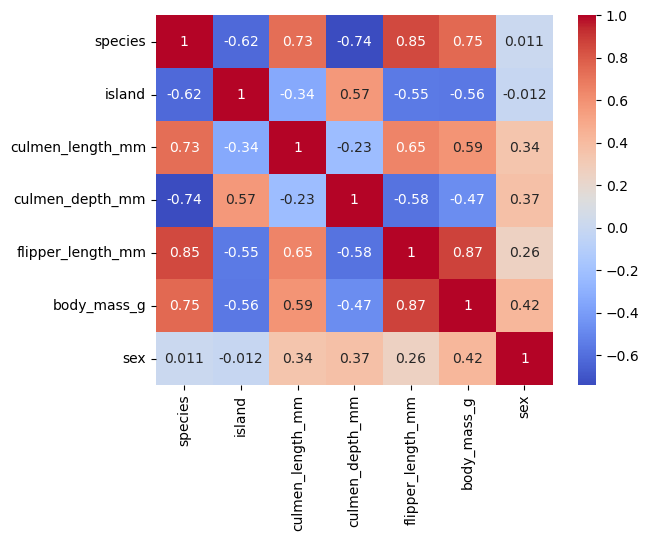

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

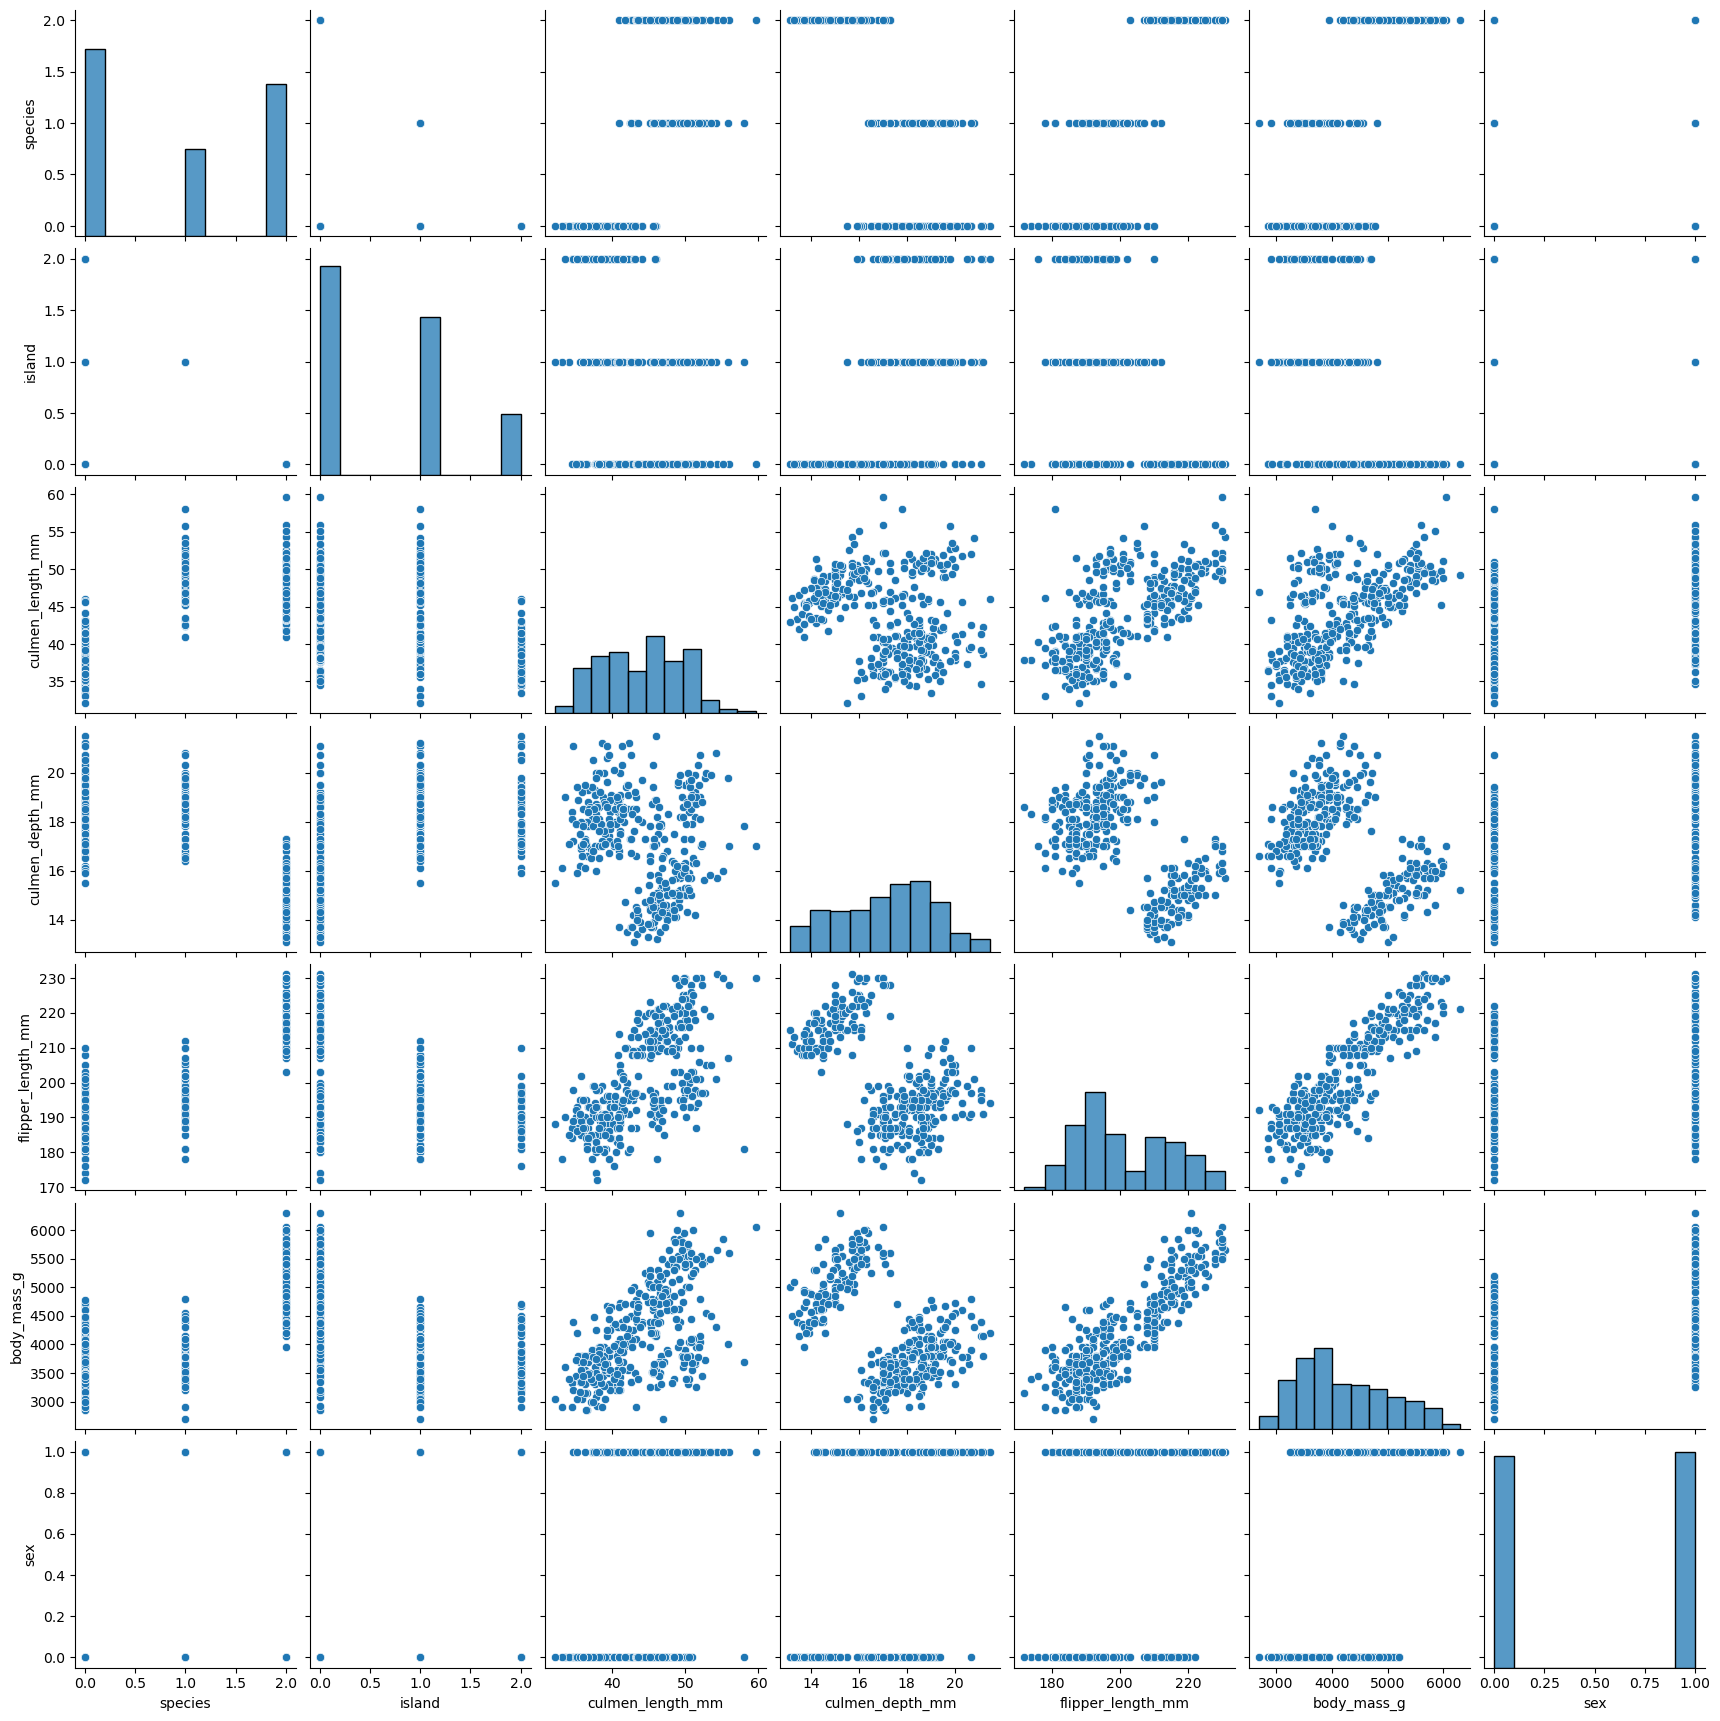

In [ ]:
sns.pairplot(df)
plt.show()

# Modeling

## Model 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(['sex', 'species', 'island'], axis=1)
y = df['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[31,  6],
       [ 2, 28]], dtype=int64)

## Model 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['species', 'sex', 'island'], axis=1)
y = df['species']

tree = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree.fit(X_train, y_train)

DecisionTreeClassifier()

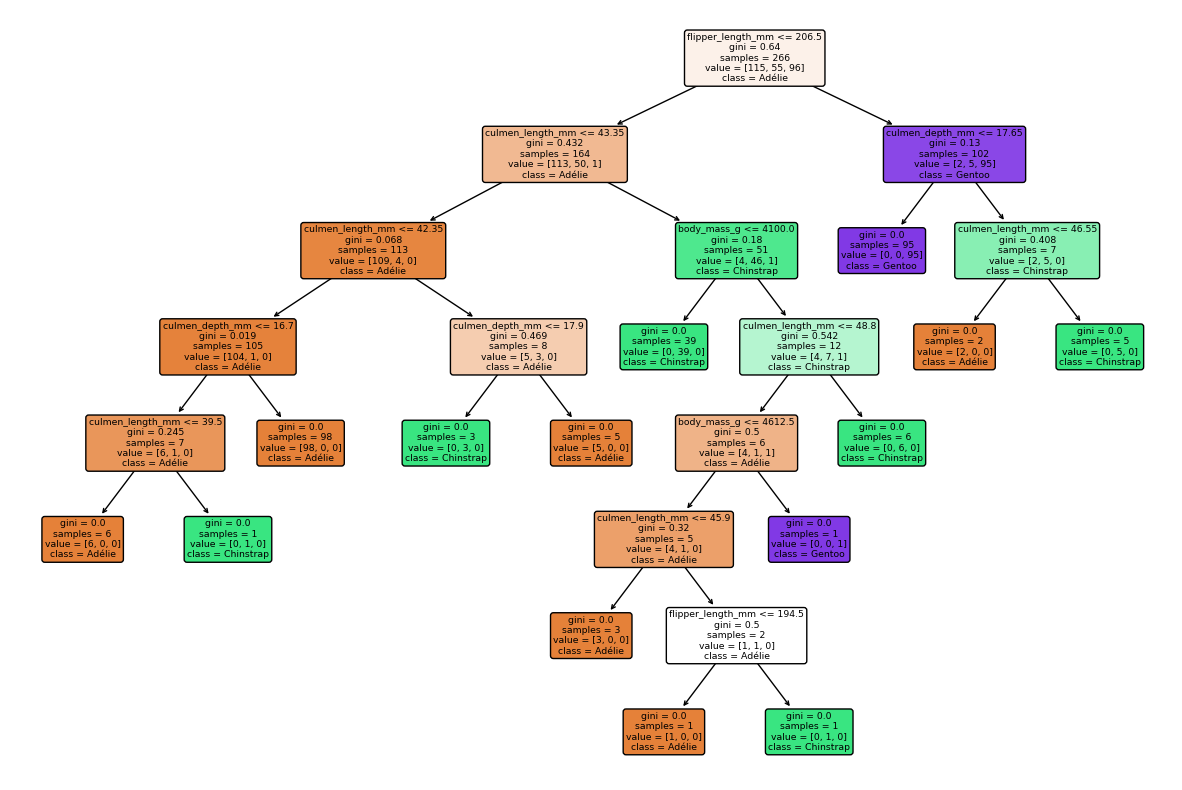

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=list(X.columns), class_names=['Adélie', 'Chinstrap', 'Gentoo'], filled=True, rounded=True)
plt.show()


In [ ]:
tree.score(X_test, y_test)

0.9850746268656716